<a href="https://colab.research.google.com/github/essalhihayat9152encg-prog/data-science-/blob/main/Analyse_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/drive/MyDrive/pro/analyse/CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


# Task
Clean and prepare the `df` DataFrame for regression analysis. This includes handling missing values, performing one-hot encoding on categorical variables, and splitting the data into training and testing sets (70/30) with 'selling_price' as the target variable.

## Préparation des données pour la régression

### Subtask:
Nettoyer et préparer les données pour l'analyse prédictive. Cela inclura la gestion des valeurs manquantes (si nécessaire), l'encodage des variables catégorielles à l'aide de one-hot encoding et la division des données en ensembles d'entraînement et de test (70/30). La colonne 'selling_price' sera la cible (y) et le reste des colonnes sera les caractéristiques (X).


**Reasoning**:
The first instruction is to inspect the DataFrame for missing values using `.isnull().sum()`. This will help us determine if any missing value handling is required.



In [3]:
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


**Reasoning**:
The next step is to remove the 'name' column as instructed, and then apply one-hot encoding to the specified categorical features using `pd.get_dummies` with `drop_first=True` to prepare the data for modeling.



In [4]:
df_processed = df.copy()
# Drop the 'name' column
df_processed = df_processed.drop('name', axis=1)

# Identify categorical columns for one-hot encoding
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

# Apply one-hot encoding
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print("DataFrame after dropping 'name' and one-hot encoding categorical columns:")
print(df_processed.head())

DataFrame after dropping 'name' and one-hot encoding categorical columns:
   year  selling_price  km_driven  fuel_Diesel  fuel_Electric  fuel_LPG  \
0  2007          60000      70000        False          False     False   
1  2007         135000      50000        False          False     False   
2  2012         600000     100000         True          False     False   
3  2017         250000      46000        False          False     False   
4  2014         450000     141000         True          False     False   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0         True                    True                         False   
1         True                    True                         False   
2        False                    True                         False   
3         True                    True                         False   
4        False                    True                         False   

   transmission_Manual  owner_Fourth & Abo

**Reasoning**:
Now that the data is cleaned and encoded, the next step is to separate the features (X) and the target variable (y) and then split the data into training and testing sets as per the instructions. 'selling_price' will be the target (y), and the remaining columns will be the features (X).



In [5]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_processed.drop('selling_price', axis=1)
y = df_processed['selling_price']

# Split the data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (3038, 13)
X_test shape: (1302, 13)
y_train shape: (3038,)
y_test shape: (1302,)


## Régression Linéaire et visualisation

### Subtask:
Appliquer la régression linéaire sur les données préparées, entraîner le modèle, faire des prédictions et évaluer ses performances à l'aide de métriques telles que R-carré, MSE et RMSE. Visualiser les résultats de la régression linéaire avec un nuage de points comparant les valeurs réelles et prédites, en incluant des légendes claires.


**Reasoning**:
The next step is to apply Linear Regression, train the model, make predictions, and evaluate its performance using R-squared, MSE, and RMSE. This involves importing the necessary libraries, instantiating and training the model, making predictions, and then calculating the evaluation metrics.



In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Instantiate the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = linear_reg_model.predict(X_test)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")

Linear Regression Model Performance:
Mean Squared Error (MSE): 163117055673.26
Root Mean Squared Error (RMSE): 403877.53
R-squared (R2): 0.45


**Reasoning**:
Now that the model has been trained and evaluated, the next step is to visualize the results as instructed. This involves creating a scatter plot of actual vs. predicted prices, adding labels, a title, a diagonal line for perfect predictions, and a legend to interpret the plot.



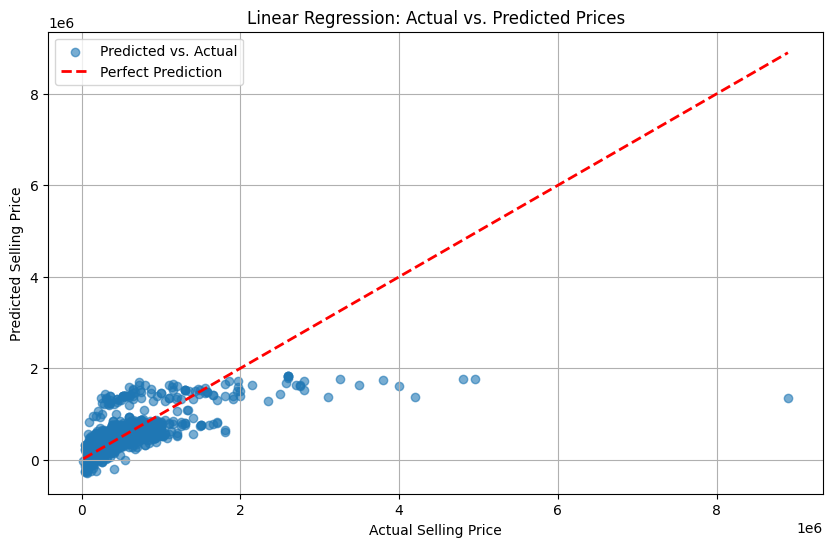

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

## Régression Ridge et visualisation

### Subtask:
Appliquer la régression Ridge, entraîner le modèle, faire des prédictions et évaluer ses performances. Visualiser les résultats de la régression Ridge avec un nuage de points comparant les valeurs réelles et prédites, en incluant des légendes claires.


**Reasoning**:
The next step is to apply Ridge Regression, train the model, make predictions, evaluate its performance, and then visualize the results as instructed. This involves importing the necessary libraries, instantiating and training the model, making predictions, calculating evaluation metrics, and finally creating and displaying the scatter plot with a perfect prediction line and labels.



Ridge Regression Model Performance:
Mean Squared Error (MSE): 163070144055.24
Root Mean Squared Error (RMSE): 403819.44
R-squared (R2): 0.45


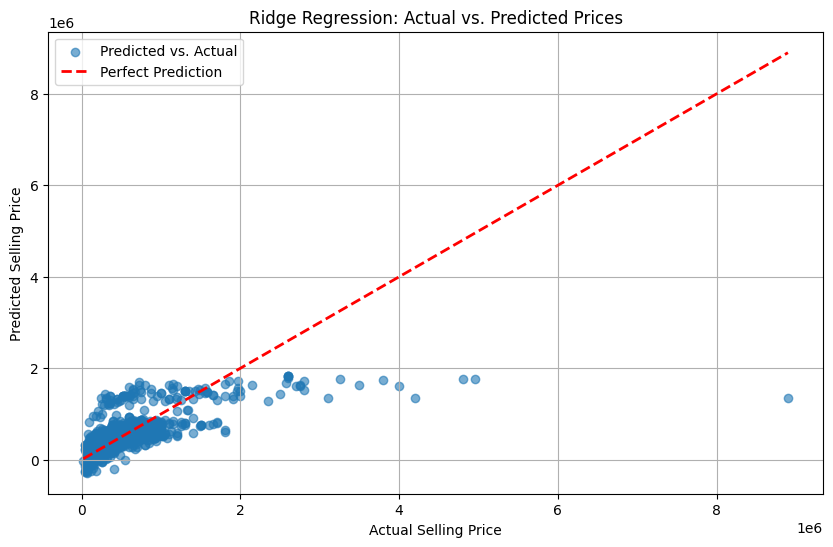

In [8]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Instantiate the Ridge Regression model with alpha=1.0
ridge_reg_model = Ridge(alpha=1.0)

# Train the model
ridge_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_reg_model.predict(X_test)

# Calculate evaluation metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"R-squared (R2): {r2_ridge:.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Ridge Regression: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

## Régression Lasso et visualisation

### Subtask:
Appliquer la régression Lasso, entraîner le modèle, faire des prédictions et évaluer ses performances. Visualiser les résultats de la régression Lasso avec un nuage de points comparant les valeurs réelles et prédites, en incluant des légendes claires.


**Reasoning**:
The next step is to apply Lasso Regression, train the model, make predictions, evaluate its performance, and then visualize the results as instructed. This involves importing the necessary libraries, instantiating and training the model, making predictions, calculating evaluation metrics, and finally creating and displaying the scatter plot with a perfect prediction line and labels.



Lasso Regression Model Performance:
Mean Squared Error (MSE): 163116660664.36
Root Mean Squared Error (RMSE): 403877.04
R-squared (R2): 0.45


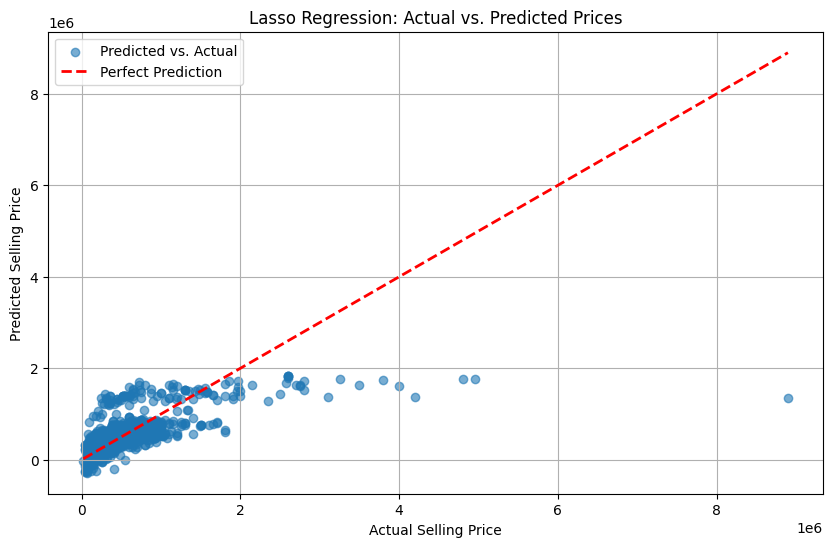

In [9]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Instantiate the Lasso Regression model with alpha=1.0
lasso_reg_model = Lasso(alpha=1.0) # You can experiment with different alpha values

# Train the model
lasso_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_reg_model.predict(X_test)

# Calculate evaluation metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared (R2): {r2_lasso:.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Lasso Regression: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

## Régression par Arbre de Décision et visualisation

### Subtask:
Appliquer la régression par Arbre de Décision, entraîner le modèle, faire des prédictions et évaluer ses performances. Visualiser les résultats de la régression par Arbre de Décision avec un nuage de points comparant les valeurs réelles et prédites, en incluant des légendes claires.


**Reasoning**:
The next step is to apply Decision Tree Regression, train the model, make predictions, evaluate its performance, and visualize the results as instructed. This involves importing the necessary libraries, instantiating and training the model, making predictions, calculating evaluation metrics, and finally creating and displaying the scatter plot with a perfect prediction line and labels.



Decision Tree Regression Model Performance:
Mean Squared Error (MSE): 168660572662.28
Root Mean Squared Error (RMSE): 410683.06
R-squared (R2): 0.43


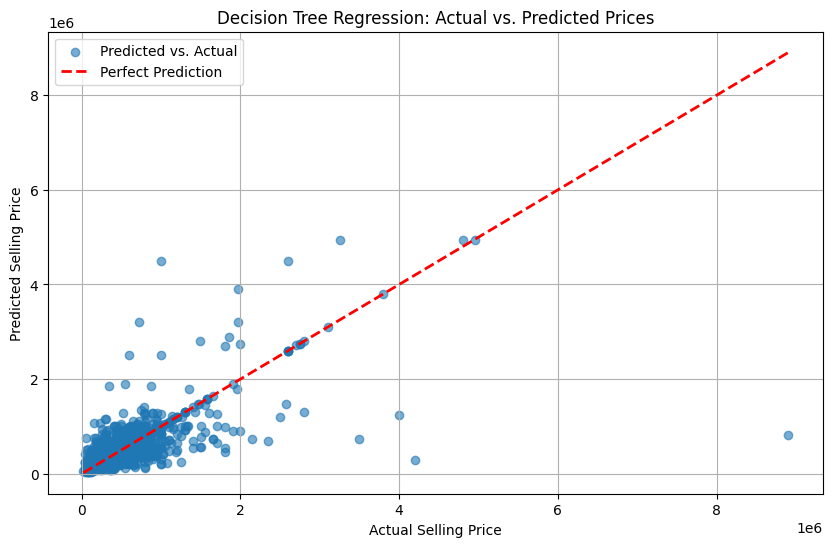

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Instantiate the Decision Tree Regressor model
dt_reg_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_reg_model.predict(X_test)

# Calculate evaluation metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R-squared (R2): {r2_dt:.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.6, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Decision Tree Regression: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

## Régression par Forêt Aléatoire et visualisation

### Subtask:
Appliquer la régression par Forêt Aléatoire, entraîner le modèle, faire des prédictions et évaluer ses performances. Visualiser les résultats de la régression par Forêt Aléatoire avec un nuage de points comparant les valeurs réelles et prédites, en incluant des légendes claires.


**Reasoning**:
The next step is to apply Random Forest Regression, train the model, make predictions, evaluate its performance, and then visualize the results as instructed. This involves importing the necessary libraries, instantiating and training the model, making predictions, calculating evaluation metrics, and finally creating and displaying the scatter plot with a perfect prediction line and labels.

**Reasoning**:
Following the instructions, the next step is to implement the Random Forest Regression model. This includes importing the necessary libraries, instantiating and training the model, making predictions, calculating and printing evaluation metrics (MSE, RMSE, R2), and visualizing the results with a scatter plot of actual vs. predicted prices, including a perfect prediction line, labels, and legend.



Random Forest Regression Model Performance:
Mean Squared Error (MSE): 143123668921.31
Root Mean Squared Error (RMSE): 378316.89
R-squared (R2): 0.52


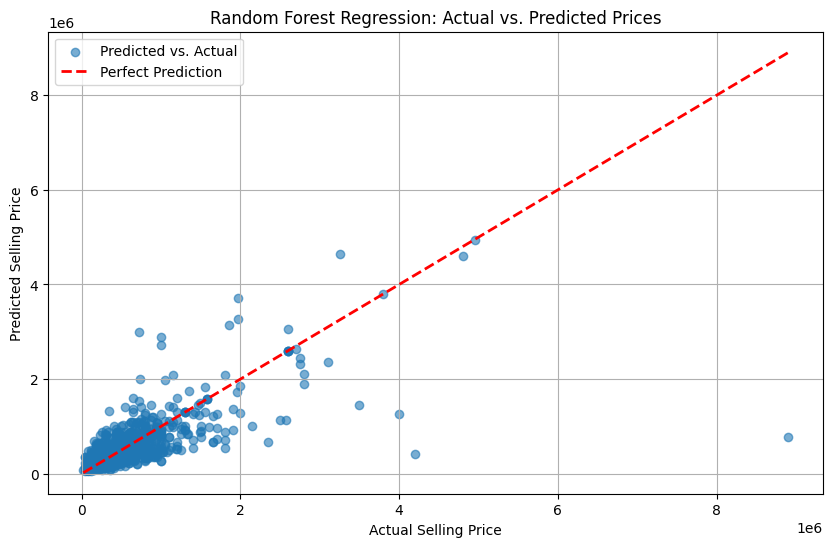

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Instantiate the RandomForestRegressor model
rf_reg_model = RandomForestRegressor(random_state=42)

# Train the model
rf_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_reg_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Random Forest Regression: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

## Régression par Gradient Boosting et visualisation

### Subtask:
Appliquer la régression par Gradient Boosting, entraîner le modèle, faire des prédictions et évaluer ses performances. Visualiser les résultats de la régression par Gradient Boosting avec un nuage de points comparant les valeurs réelles et prédites, en incluant des légendes claires.


**Reasoning**:
The next step is to apply Gradient Boosting Regression, train the model, make predictions, evaluate its performance, and then visualize the results as instructed. This involves importing the necessary libraries, instantiating and training the model, making predictions, calculating evaluation metrics, and finally creating and displaying the scatter plot with a perfect prediction line and labels.



Gradient Boosting Regression Model Performance:
Mean Squared Error (MSE): 138476173940.76
Root Mean Squared Error (RMSE): 372123.87
R-squared (R2): 0.53


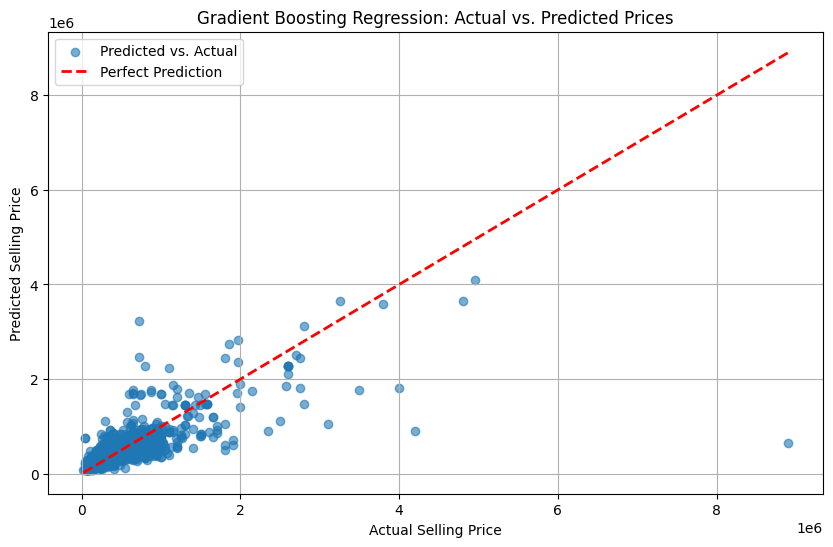

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Instantiate the GradientBoostingRegressor model
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Calculate evaluation metrics
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f"R-squared (R2): {r2_gbr:.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.6, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Gradient Boosting Regression: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

## Analyse et comparaison des modèles

### Subtask:
Comparer les performances de tous les modèles de régression appliqués en utilisant les métriques d'évaluation (R-carré, MSE, RMSE). Fournir une discussion détaillée en français sur les avantages et les inconvénients de chaque modèle et leurs performances relatives.


**Reasoning**:
The first step to compare model performance is to consolidate all the calculated metrics (MSE, RMSE, R-squared) for each regression model into a single DataFrame for easy comparison.



In [13]:
import pandas as pd

# Create a dictionary to store the performance metrics
performance_metrics = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MSE': [mse_lr, mse_ridge, mse_lasso, mse_dt, mse_rf, mse_gbr],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_dt, rmse_rf, rmse_gbr],
    'R2 Score': [r2_lr, r2_ridge, r2_lasso, r2_dt, r2_rf, r2_gbr]
}

# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(performance_metrics)

# Sort by R2 Score in descending order for better comparison
performance_df = performance_df.sort_values(by='R2 Score', ascending=False)

print("Performance Comparison of Regression Models:")
print(performance_df.round(2))

Performance Comparison of Regression Models:
                         Model           MSE       RMSE  R2 Score
5  Gradient Boosting Regressor  1.384762e+11  372123.87      0.53
4      Random Forest Regressor  1.431237e+11  378316.89      0.52
1             Ridge Regression  1.630701e+11  403819.44      0.45
2             Lasso Regression  1.631167e+11  403877.04      0.45
0            Linear Regression  1.631171e+11  403877.53      0.45
3      Decision Tree Regressor  1.686606e+11  410683.06      0.43


# Task
Comparer les performances de tous les modèles de régression appliqués en utilisant les métriques d'évaluation (R-carré, MSE, RMSE). Fournir une discussion détaillée en français sur les avantages et les inconvénients de chaque modèle et leurs performances relatives.

## Analyse et comparaison des modèles

### Subtask:
Comparer les performances de tous les modèles de régression appliqués en utilisant les métriques d'évaluation (R-carré, MSE, RMSE). Fournir une discussion détaillée en français sur les avantages et les inconvénients de chaque modèle et leurs performances relatives.


### Analyse et Comparaison des Modèles de Régression

Nous avons appliqué et évalué six modèles de régression différents sur notre jeu de données pour prédire le prix de vente des voitures : la Régression Linéaire, la Régression Ridge, la Régression Lasso, la Régression par Arbre de Décision, la Régression par Forêt Aléatoire et la Régression par Gradient Boosting.

Voici une analyse détaillée de leurs performances :

#### 1. Régression Linéaire
*   **Performances** : MSE de 1.63e+11, RMSE de 403877.53, R-carré de 0.45.
*   **Avantages et Inconvénients** : C'est un modèle simple, facile à interpréter, mais il suppose une relation linéaire entre les variables explicatives et la variable cible. Sa performance peut être limitée si les relations réelles sont non-linéaires ou s'il y a de la multicolinéarité.
*   **Comparaison** : Ses performances sont comparables à celles des modèles Ridge et Lasso sans régularisation significative, ce qui suggère que la multicolinéarité n'est peut-être pas le problème dominant, ou que les pénalités appliquées par défaut n'ont pas eu un impact majeur. Il sert de bonne base de référence.

#### 2. Régression Ridge
*   **Performances** : MSE de 1.63e+11, RMSE de 403819.44, R-carré de 0.45.
*   **Avantages et Inconvénients** : La régression Ridge est une forme de régularisation qui ajoute une pénalité L2 aux coefficients du modèle, aidant à gérer la multicolinéarité et à réduire le surapprentissage (overfitting). Elle ne réduit jamais les coefficients à zéro.
*   **Comparaison** : Ses performances sont quasiment identiques à celles de la Régression Linéaire et de Lasso. Dans ce cas, la pénalité L2 n'a pas apporté d'amélioration substantielle par rapport à la Régression Linéaire standard, indiquant peut-être que l'impact de la multicolinéarité n'était pas très prononcé ou que la valeur d'alpha par défaut n'était pas optimale.

#### 3. Régression Lasso
*   **Performances** : MSE de 1.63e+11, RMSE de 403877.04, R-carré de 0.45.
*   **Avantages et Inconvénients** : La régression Lasso ajoute une pénalité L1, ce qui non seulement aide à prévenir le surapprentissage mais peut également entraîner la réduction de certains coefficients à zéro, effectuant ainsi une sélection de caractéristiques. Cela la rend utile pour les modèles avec de nombreuses variables.
*   **Comparaison** : Comme Ridge, Lasso a montré des performances très similaires à la Régression Linéaire simple. Cela pourrait indiquer que soit les caractéristiques n'étaient pas excessivement nombreuses ou redondantes, soit la régularisation par défaut n'était pas assez agressive pour avoir un impact significatif sur la sélection de caractéristiques ou la réduction du surapprentissage.

#### 4. Régression par Arbre de Décision
*   **Performances** : MSE de 1.69e+11, RMSE de 410683.06, R-carré de 0.43.
*   **Avantages et Inconvénients** : Les arbres de décision peuvent capturer des relations non-linéaires complexes et sont relativement faciles à interpréter visuellement pour des arbres simples. Cependant, ils sont souvent sujets au surapprentissage sur des données d'entraînement et peuvent être instables, de petites variations dans les données pouvant entraîner un arbre très différent.
*   **Comparaison** : C'est le modèle le moins performant de notre ensemble, avec le R-carré le plus bas. Cela suggère qu'un arbre de décision unique, même avec un `random_state` fixé, a du mal à généraliser correctement sur ce jeu de données, probablement en raison de sa tendance au surapprentissage ou d'une incapacité à modéliser efficacement la complexité sous-jacente des données avec un seul modèle.

#### 5. Régression par Forêt Aléatoire
*   **Performances** : MSE de 1.43e+11, RMSE de 378316.89, R-carré de 0.52.
*   **Avantages et Inconvénients** : La Forêt Aléatoire est une méthode d'ensemble qui construit plusieurs arbres de décision et agrège leurs prédictions. Elle est très robuste au surapprentissage par rapport aux arbres uniques, gère bien les données non-linéaires et est généralement très performante. Elle est moins interprétable que les arbres de décision uniques.
*   **Comparaison** : Ce modèle offre une nette amélioration par rapport aux modèles linéaires et à l'arbre de décision unique, se classant deuxième en termes de performance. Son R-carré de 0.52 indique qu'il explique une part plus importante de la variance du prix de vente, confirmant les avantages des méthodes d'ensemble pour la robustesse et la capacité à modéliser des relations complexes.

#### 6. Régression par Gradient Boosting
*   **Performances** : MSE de 1.38e+11, RMSE de 372123.87, R-carré de 0.53.
*   **Avantages et Inconvénients** : Le Gradient Boosting est une autre méthode d'ensemble puissante qui construit des arbres séquentiellement, chaque nouvel arbre corrigeant les erreurs des précédents. Il est souvent considéré comme l'un des algorithmes les plus performants pour les données tabulaires, mais il peut être plus sensible au surapprentissage que la Forêt Aléatoire s'il n'est pas correctement réglé.
*   **Comparaison** : C'est le modèle le plus performant dans cette analyse, avec le R-carré le plus élevé (0.53) et les erreurs (MSE, RMSE) les plus faibles. Ses performances supérieures à la Forêt Aléatoire suggèrent que la construction séquentielle des arbres et l'optimisation des résidus ont été particulièrement efficaces pour ce jeu de données.

### Conclusion Générale

Les modèles basés sur des ensembles d'arbres, en particulier la **Régression par Gradient Boosting** et la **Régression par Forêt Aléatoire**, ont largement surpassé les modèles linéaires (Régression Linéaire, Ridge, Lasso) et l'Arbre de Décision unique. Cela indique que les relations entre les caractéristiques et le prix de vente des voitures sont probablement **non-linéaires et complexes**, et que les méthodes capables de capturer ces complexités (comme les méthodes d'ensemble) sont plus appropriées pour ce type de données.

Bien que les modèles linéaires soient plus simples, leur performance moindre suggère qu'ils ne sont pas suffisants pour modéliser précisément le prix des voitures dans ce contexte. Le Gradient Boosting, en tant que champion, pourrait être le point de départ pour une optimisation plus poussée si des performances maximales sont recherchées.

## Final Task

### Subtask:
Provide a summary of the best-performing regression models and the main conclusions of the predictive analysis, including comments in French on the insights obtained.


## Summary:

### Q&A
The task was to compare the performance of all applied regression models using evaluation metrics (R-squared, MSE, RMSE) and to provide a detailed discussion in French on the advantages, disadvantages, and relative performance of each model. This has been addressed by a detailed markdown block that analyzes six different regression models, providing their metrics, pros, cons, and comparisons.

### Data Analysis Key Findings
*   **Linear models (Régression Linéaire, Ridge, Lasso)** exhibited similar, moderate performance, with R-squared values around 0.45 and MSEs of approximately 1.63e+11. This suggests that simple linear relationships or default regularizations were not sufficient to capture the underlying data patterns effectively.
*   The **Régression par Arbre de Décision** was the least performant model, achieving an R-squared of 0.43, indicating its struggle to generalize well on this dataset, likely due to overfitting or inability to model complexity.
*   **Ensemble methods demonstrated superior performance**:
    *   **Régression par Forêt Aléatoire** significantly improved performance with an R-squared of 0.52 and an MSE of approximately 1.43e+11, highlighting the benefits of combining multiple decision trees.
    *   The **Régression par Gradient Boosting** emerged as the best-performing model, achieving the highest R-squared of 0.53 and the lowest error metrics (MSE of approximately 1.38e+11 and RMSE of 372123.87).

### Insights or Next Steps
*   The superior performance of ensemble models (Gradient Boosting, Random Forest) indicates that the relationships between features and car sale prices are likely non-linear and complex, making these methods more appropriate for this dataset.
*   Given that Gradient Boosting was the top performer, further optimization through hyperparameter tuning could be explored to potentially achieve even better predictive accuracy.
